In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
%run scripts/helper.py

In [2]:
magazino_train = load_data('./train.csv/train.csv', index_col='id')
magazino_test = load_data('./test.csv', index_col='id')

In [163]:
magazino_train.columns = trim_column(magazino_train)
magazino_test.columns = trim_column(magazino_test)

In [164]:
features_train = return_features(magazino_train)
features_test = return_features(magazino_test)

In [169]:
features_train = pd.concat([features_train, pd.get_dummies(magazino_train.category_article, prefix='category_')], axis=1)
features_test = pd.concat([features_test, pd.get_dummies(magazino_test.category_article, prefix='category_')], axis=1)

In [171]:
features_train = pd.concat([features_train, pd.get_dummies(magazino_train.day_of_publishing, prefix='day_')], axis=1)
features_test = pd.concat([features_test, pd.get_dummies(magazino_test.day_of_publishing, prefix='day_')], axis=1)

In [172]:
y = get_target(magazino_train, 'shares')

In [173]:
print features_train.shape, ' ' , features_test.shape

(24875, 58)   (10089, 58)


In [197]:
# Split the dataset
Xt, Xv, yt, yv = split_data(features_train, y)

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scl = StandardScaler()

In [200]:
Xt = scl.fit_transform(Xt)

In [201]:
Xv = scl.transform(Xv)

In [202]:
length_train = len(Xt)

In [203]:
Xt_a = Xt[:length_train/2]
yt_a = yt[:length_train/2]

Xt_b = Xt[length_train/2:]
yt_b = yt[length_train/2:]

In [204]:
model_a = build_model(Xt_a, yt_a)
model_b = build_model(Xt_b, yt_b)

In [205]:
pred_b = model_a.predict(Xt_b)
pred_a = model_b.predict(Xt_a)

In [206]:
pred_b = pred_b.reshape(-1, 1)
pred_a = pred_a.reshape(-1, 1)

In [207]:
features_a = np.hstack([Xt_a, pred_a])
features_b = np.hstack([Xt_b, pred_b])

In [208]:
Xt_train = np.vstack([features_a, features_b])

In [209]:
Xt_train.shape

(19900, 59)

In [210]:
model = build_model(Xt_train, yt)

In [211]:
yt_pred = model.predict(Xt_train)

In [212]:
print 'RMSE on training set is %0.4f ' %(RMSE(yt, yt_pred))

RMSE on training set is 11975.7186 


In [213]:
length_test = len(Xv)

Xv_a = Xv[:length_test/2]
yv_a = yv[:length_test/2]

Xv_b = Xv[length_test/2:]
yv_b = yv[length_test/2:]

In [214]:
pred_test_b = model_a.predict(Xv_b)
pred_test_a = model_b.predict(Xv_a) 

In [215]:
pred_test_b = pred_test_b.reshape(-1, 1)
pred_test_a = pred_test_a.reshape(-1, 1)

In [216]:
features_test_a = np.hstack([Xv_a, pred_test_a])
features_test_b = np.hstack([Xv_b, pred_test_b])

In [217]:
Xv_test = np.vstack([features_test_a, features_test_b])

In [218]:
yv_pred = model.predict(Xv_test)

In [219]:
print 'RMSE on validation set %0.4f ' %(RMSE(yv, yv_pred))

RMSE on validation set 7930.5722 


### Train on whole dataset

In [67]:
length_full = len(features_train)

In [68]:
X_a = features_train[:length_full/2]
y_a = y[:length_full/2]

X_b = features_train[length_full/2:]
y_b = y[length_full/2:]

In [70]:
model_a = build_model(X_a, y_a)
model_b = build_model(X_b, y_b)

In [71]:
pred_b = model_a.predict(X_b)
pred_a = model_b.predict(X_a)

In [72]:
pred_b = pred_b.reshape(-1, 1)
pred_a = pred_a.reshape(-1, 1)

In [73]:
features_a = np.hstack([X_a, pred_a])
features_b = np.hstack([X_b, pred_b])

In [74]:
X_train = np.vstack([features_a, features_b])

In [75]:
model_full = build_model(X_train, y)

In [77]:
length_test = len(features_test)

In [78]:
X_test_a = features_test[:length_test/2]
X_test_b = features_test[length_test/2:]

In [79]:
pred_test_b = model_a.predict(X_test_b)
pred_test_a = model_b.predict(X_test_a)

In [82]:
pred_test_b = pred_test_b.reshape(-1, 1)
pred_test_a = pred_test_a.reshape(-1, 1)

In [83]:
features_test_a = np.hstack([X_test_a, pred_test_a])
features_test_b = np.hstack([X_test_b, pred_test_b])

In [84]:
X_test = np.vstack([features_test_a, features_test_b])

In [85]:
final_predictions = model_full.predict(X_test)

In [86]:
make_submission(magazino_test.index.values, final_predictions, 'stacking_Results.csv')

## Plotting True v/s Actual Predictions

In [87]:
preds = model_full.predict(X_train)

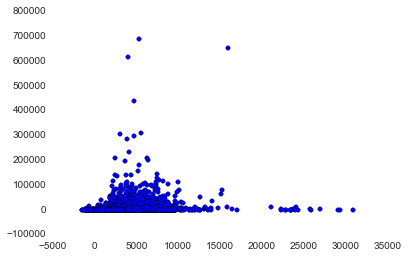

In [91]:
plt.scatter(preds, y);